<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/Graph_atlas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Connected Graphs with up to 6 Nodes</h1></b>

Dr. Bingsen Wang

6/17/2023
</center>

#Introduction

This animation is based on this [reference](https://networkx.org/documentation/stable/auto_examples/graphviz_layout/plot_atlas.html#sphx-glr-auto-examples-graphviz-layout-plot-atlas-py)

#Python Code

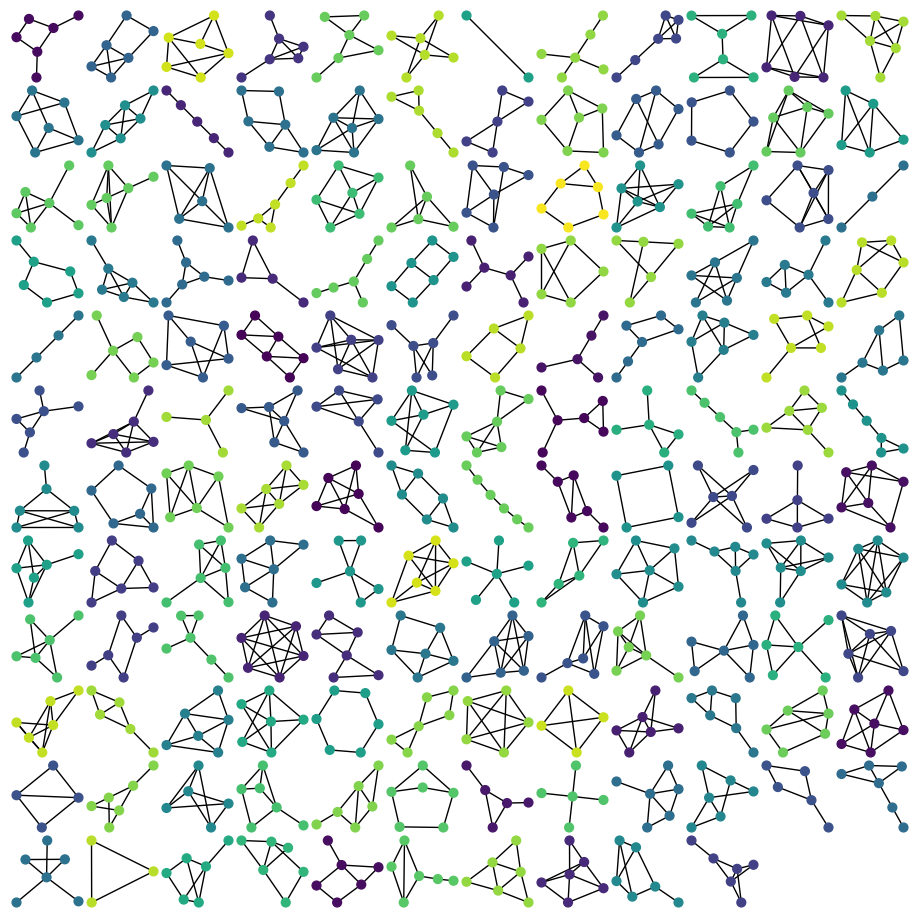

In [18]:
from numpy.core.function_base import linspace
import random
import networkx as nx
import matplotlib
from os import linesep
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

#parameters
Nf = 142
nlst=linspace(0,Nf-1,Nf).tolist()
GraphMatcher = nx.isomorphism.vf2userfunc.GraphMatcher
def atlas6():
    """Return the atlas of all connected graphs with at most 6 nodes"""
    Atlas = nx.graph_atlas_g()[3:209]  # 0, 1, 2 => no edges. 208 is last 6 node graph
    U = nx.Graph()  # graph for union of all graphs in atlas
    for G in Atlas:
        # check if connected
        if nx.number_connected_components(G) == 1:
            # check if isomorphic to a previous graph
            if not GraphMatcher(U, G).subgraph_is_isomorphic():
                U = nx.disjoint_union(U, G)
    return U
G = atlas6()
fig = plt.figure(figsize=(9,9))
fig.tight_layout()
axs=[]
for k in range(12):
  for m in range(12):
    ax=fig.add_axes([m/12,(11-k)/12,1/12,1/12],fc='none') #no fc
    ax.axis('off') #turn off axis frames
    axs.append(ax)
C = [G.subgraph(c) for c in nx.connected_components(G)]

def ini():
  return
# animation function. This is called sequentially
def animate(i):
  c = [random.random()] * nx.number_of_nodes(C[i])
  k=random.choice(nlst)
  nlst.remove(k)
  pos=nx.spring_layout(C[i])
  nx.draw_networkx(C[i],pos, node_size=40, node_color=c,
                   vmin=0.0, vmax=1.0, with_labels=False,ax=axs[int(k)])
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf, init_func=ini, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = "Graph_atlas.mp4"
writervideo = animation.FFMpegWriter(fps=5)
anim.save(fn, writer=writervideo,dpi = 120)
